# **GA-NLP Mid-term Project: Support Ticket Categorization**

## **Business Context**

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to **swiftly and effectively respond to customer input** not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.

As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.

One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - **done in the modern day using Large Language Models and Generative AI.**


# **Meet 'Jeeves', the customer support AI bot**

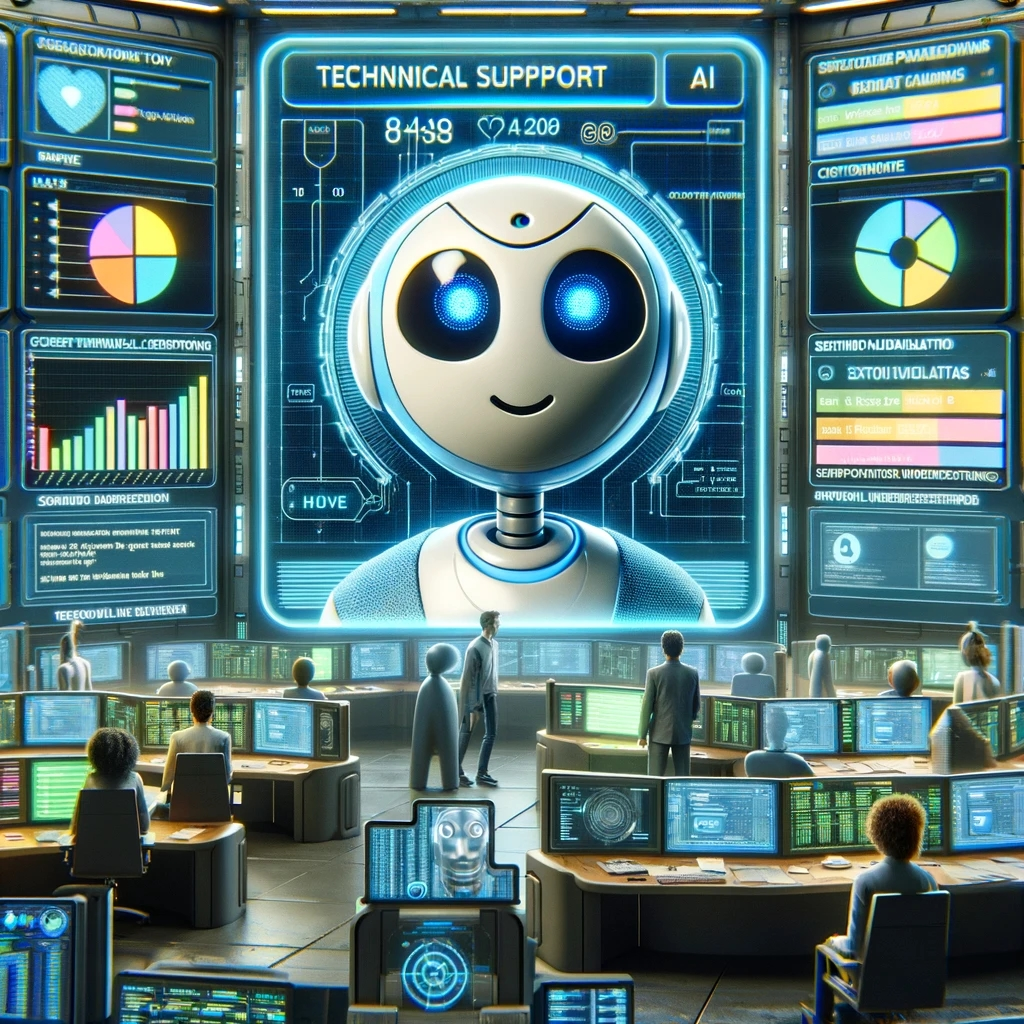

## **Project Objective**

We will be developing a Generative AI application using a Large Language Model to **automate the classification and processing of support tickets.** The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis, and store the results in a structured DataFrame.


## **Expected Output**

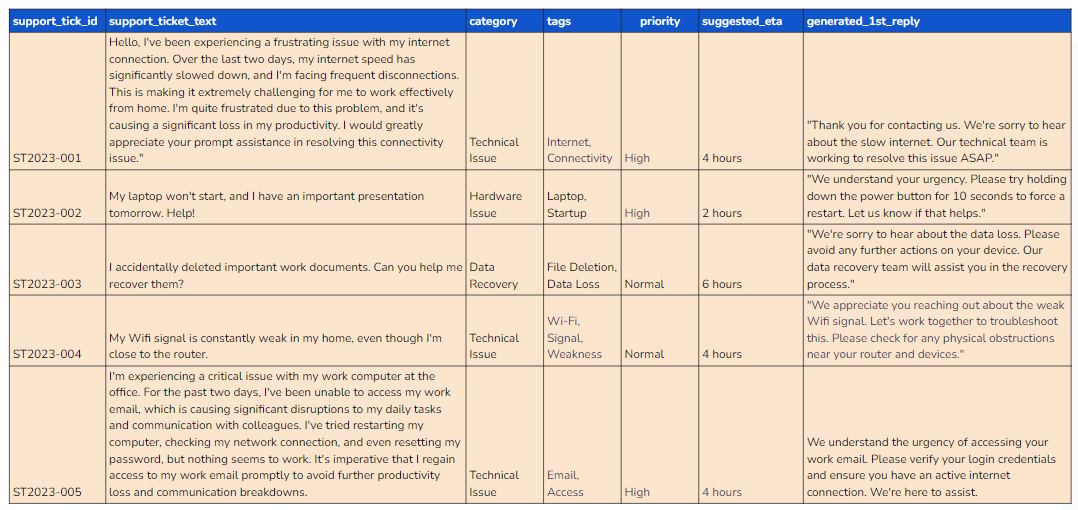

## **Model Loading**

In [ ]:
# Following installation is for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.28 --force-reinstall --upgrade --no-cache-dir --verbose

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 139.6 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
    Using cached scikit_build_core-0.8.2-py3-none-any.whl (140 kB)
    Using cached exceptiongroup-1.2.0-py3-none-any.whl (16 kB)
    Using cached packaging-24.0-py3-none-any.whl (53 kB)
    Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
    Using cached pathspec-0.12.1-py3-none-any.whl (31 kB)
    Using cached pyproject_metadata-0.7.1-py3-none-any.whl (7.4 kB)
  Installing build dependencies ... done
  Running command Getting requirements to build wheel
  Getting requirements to build wheel ... done
  Running command pip subprocess to install backend dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
    Using cached ninja-1.11.1.1-py2.py3

In [ ]:
# Following installs the hugging face hub. A collection of git repositories.
!pip install huggingface_hub

### **A1: Following Python code imports the 'hf_hub_download' function from the 'huggingface_hub' library and also imports the 'Llama' class from the 'llama_cpp' library.**

In [ ]:
# Importing the 'hf_hub_download' function from the 'huggingface_hub' library
from huggingface_hub import hf_hub_download

# Importing the 'Llama' class from the 'llama_cpp' library
from llama_cpp import Llama

In [ ]:
# Let's define the model name or path as a string from hugging face website

model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"

# Let's define the model basename as a string, indicating it's in the gguf format

model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

In [ ]:
# Downloading the model from the Hugging Face Hub using the 'hf_hub_download' function
# by specifying the 'repo_id' and 'filename'
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Creating an instance of the 'Llama' class with specified parameters

lcpp_llm = Llama(
        model_path=model_path,
        n_threads=2,  # Number of CPU cores
        n_batch=512,  # Based on the amount of VRAM in our GPU.
        n_gpu_layers=43,  # value is based on our model and GPU VRAM pool.
        n_ctx=4096,  # Context window
    )

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 1 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### **A2: Defining the System Message**

Following Python function called **generate_llama_response** takes a single parameter, support_ticket_text, which represents the user's support ticket text. Inside the function, we will perform the following tasks:

We define a system message as a string and assign it to the variable system_message.

- **We will combine the support_ticket_text and system_message to create a prompt string.**

* We will generate a response from the LLaMA model using the lcpp_llm instance with the following parameters:*

- prompt is the combined prompt string.
- max_tokens will be set to 256.
- temperature will be set to 0.
- top_p will be set to 0.95.
- repeat_penalty will be set to 1.2.
- top_k will be set to 50.
- stop will be set as a list containing 'INST'.
- echo will be set to False.

We will then extract and return the response text from the generated response.

Following detailed description is the information and guidelines the system message contains.

- **Technical Assistant Role:** We have named out technical support bot "Jeeves". We will begin with an introductory statement that establishes the role of the bot. In this case, it's acting as a guide for a technical assistant.

- **Response Options:** We will then instruct the bot only to respond with one of the predefined categories, emphasizing that other responses are not acceptable.

- **General Instructions:** The bot is being asked to adhere to the following customer support ticket processing instructions:

  - **Reading Carefully:** Stress the importance of reading the support ticket text thoroughly and considering the overall sentiment before responding.
  - **Tone:** Emphasize that the tone of all responses should be polite and professional.
  - **Output Format:** Clearly specify the desired output format for the responses generated by the assistant. In this case, the output should be in JSON format.

- **Sub-Tasks:** The secondary tasks that Jeeves should perform are as follows:

  - **Category:** The primary task of the technical assistant, will be to classify the support ticket into specific categories. The categories are:
    - Technical Issues
    - Hardware Issues
    - Data Recovery

  - **Tags:** We will provide few-shot examples to Jeeves for creating tags that will help further classify the ticket into the type of problem reported by customer.
  - **Priority:** Assign a priority level (few-shot examples, "High" or "Normal") based on bot's understanding of the text.
  - **Suggesting_ETA:** Estimate time for resolving the issue mentioned in the support ticket. One-shot example for formatting is provided.
  - **Generating_1st_Reply (Sentiment-Based):** We provided one-shot example to the bot and asked it to provide a response to the customer that aligns with the sentiment expressed in the ticket by the customer.

##### **The output of the model should be in JSON format**

In [ ]:
# Importing required files for text formatting
import json
import pandas as pd
import warnings
import textwrap
from typing import TextIO

In [ ]:
# Set the pandas dataframe display options to fit all columns and wrap the rows
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.max_rows', None)  # Ensure all rows are displayed
pd.set_option('display.expand_frame_repr', False)  # Prevent DataFrame to be split across multiple pages
pd.set_option('display.max_colwidth', None)  # Allow full width for column display (or use a large number for the max width)
pd.set_option('display.width', 0)  # Automatically detect the console width

In [ ]:
# Following function will read customer support ticket text, create a prompt, and generate a response

def generate_llama_response(support_ticket_text):

# We now create the instruction text to be included in the prompt sent to our bot
    # System message
    system_message = """
[INST]<<SYS>>
    You are Jeeves, a technical assistant who is helpful and respectful to customers. Your response should strictly adhere to one of the predefined categories. You should respond appropriately always maintaining a polite and professional tone. If possible provide relevant information or
    troubleshooting steps. Please ensure that your responses are socially unbiased and positive in nature. Your output should be in JSON format.

    Your task is to Process customer support ticket and generate classified tagged output of predefined categories. Read the support ticket text carefully and provide responses categorized into specified outputs.
    Follow examples provided for other categories.
    "category": "Technical Issue", "Hardware Issue", "Data Recovery".
     "tags": examples are, "Internet", "Connectivity", "Laptop", "Startup", "File Deletion", "Data Loss", "Wi-Fi", "Network", "Signal Strength", "E-mail Access",
      "priority": examples are, "High", "Normal",
        "suggested_eta": estimate time for resolving the issue mentioned in the support ticket, examples are, "3 Hours", "4 Hours", "5 Hours",
        "generated_1st_reply": generate a response that aligns with the sentiment expressed in the support ticket text. greet the customer and introduce yourself before the response.

    <</SYS>>[/INST]

    """

    # combine user_prompt and system_message to create the prompt
    text = f"{support_ticket_text}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=text,
        max_tokens=256,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )


    # Extract and return the response text
    response_text = response["choices"][0]["text"]  ### Fill in the blank
    return response_text



### **A3: Loading our Dataset from Colab folder**

In [ ]:
# Read a CSV file into a DataFrame and store it in the 'data' variable
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIT_LLM_GenAI/Mid-Term_LLM/Support_ticket_text_data_mid_term.csv')

In [ ]:
# Data file shape
data.shape

(21, 2)

**Our data file contains two columns and twenty one rows.**

In [ ]:
# Read data file head
data.head()

,support_tick_id,support_ticket_text
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly."
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue"
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?"
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem."
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?"


**The first column data file contains customer support ticket ID number data. The second column contains support ticket text data.**

### **A4: We will create a new column in the DataFrame called 'llama_response' and populate it with responses generated by applying the 'generate_llama_response' function to each 'support_ticket_text' in the DataFrame**

In [ ]:
# We will apply a function to each element in the 'support_ticket_text' column of the DataFrame 'data'
# The applied function, in this case, is a lambda function.
# The lambda function takes a single argument 'x', representing each individual 'support_ticket_text' in the column.
# Inside the lambda function:
# - 'generate_llama_response(x)' is called to generate a response based on the 'support_ticket_text'.
# - The result of 'generate_llama_response(x)' is assigned to a new column called 'llama_response' in the DataFrame 'data'.
# Example - data['llama_response'] = data['support_ticket_text'].apply(lambda x: generate_llama_response(x))

data['llama_response'] =data['support_ticket_text'].apply(lambda x:generate_llama_response(x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
## Check if the new column "llama_response" has been added
data.head()

,support_tick_id,support_ticket_text,llama_response
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.","{\n ""category"": ""Technical Issue"", \n ""tags"": [""Internet"", ""Connectivity""], \n ""priority"": ""High"", \n ""suggested_eta"": ""3 Hours"", \n ""generated_1st_reply"": ""Good day, I'm Jeeves, your technical assistant. Sorry to hear that you are experiencing slow internet connectivity and frequent disconnections. Please be assured that we will do our best to resolve this issue as soon as possible.""\n }"
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue","{\n ""category"": ""Technical Issue"",\n ""tags"": [""Laptop"", ""Startup""],\n ""priority"": ""High"",\n ""suggested_eta"": ""3 Hours"",\n ""generated_1st_reply"": ""Good day, I'm Jeeves, your technical assistant. Sorry to hear that you're experiencing issues with your laptop starting up. Please provide me with more details about the issue so I can assist you better.""\n }"
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?","{\n ""category"": ""Data Recovery"",\n ""tags"": [""File Deletion"", ""Data Loss""],\n ""priority"": ""High"",\n ""suggested_eta"": ""3 Hours"",\n ""generated_1st_reply"": ""Good day, I'm Jeeves, your technical assistant. Sorry to hear that you accidentally deleted essential work documents causing substantial data loss. Please don't worry; we can try to recover the lost files. Can you please provide me with more details about the situation? What type of file were they, and where did you store them?""\n }"
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.","{\n ""category"": ""Technical Issue"",\n ""tags"": [""Wi-Fi"", ""Network"", ""Signal Strength""],\n ""priority"": ""Normal"",\n ""suggested_eta"": ""3 Hours"",\n ""generated_1st_reply"": ""Good day, Thank you for reaching out to us. Sorry to hear that you're experiencing a weak Wi-Fi signal at home despite being close to the router. I'm here to help you troubleshoot and resolve this issue. Can you please provide me with more details such as your Wi-Fi router model, the distance between your device and the router, any obstructions or interference that might be causing issues?""\n }"
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?","{\n ""category"": ""Technical Issue"", \n ""tags"": [""Battery Life"", ""Smartphone""], \n ""priority"": ""Normal"", \n ""suggested_eta"": ""2 Hours"", \n ""generated_1st_reply"": ""Good day, Thank you for reaching out to us. I'm Jeeves, your technical assistant. Sorry to hear that your smartphone battery is draining rapidly. Please provide me with more details about the issue so I can assist you better.""\n }"


In [ ]:
# Let's take a look at our Llama response in JSON format
data['llama_response'][0]

' {\n      "category": "Technical Issue", \n       "tags": ["Internet", "Connectivity"], \n        "priority": "High", \n         "suggested_eta": "3 Hours", \n          "generated_1st_reply": "Good day, I\'m Jeeves, your technical assistant. Sorry to hear that you are experiencing slow internet connectivity and frequent disconnections. Please be assured that we will do our best to resolve this issue as soon as possible."\n     }'

### **A5: We will prepare the dataset in the desired format shown in the example**

In [ ]:
# Following function is called to convert arrays to strings in JSON output to remove '[ ]' square brackets. It is then parsed into columns

def convert_arrays_to_strings(value):
    #"""Recursively convert lists to comma-separated strings."""
    if isinstance(value, dict):  # If the value is a dictionary, apply this function to its values
        return {key: convert_arrays_to_strings(val) for key, val in value.items()}
    elif isinstance(value, list):  # If the value is a list, convert it to a comma-separated string
        return ', '.join(map(str, value))
    else:  # If the value is neither a dict nor a list, return it as is
        return value

# Function to parse JSON data and extract key-value pairs
def extract_json_data(json_str):
    try:
        data_dict = json.loads(json_str)
        # Convert all arrays/lists to strings
        data_dict = convert_arrays_to_strings(data_dict)
        return data_dict
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

# Apply the function to the 'llama_response' column
data['llama_response_parsed'] = data['llama_response'].apply(extract_json_data)

In [ ]:
# All columns are visible with proper tags in the first row. We have successfully processed all 20 rows of data.
data

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.","{\n ""category"": ""Technical Issue"", \n ""tags"": [""Internet"", ""Connectivity""], \n ""priority"": ""High"", \n ""suggested_eta"": ""3 Hours"", \n ""generated_1st_reply"": ""Good day, I'm Jeeves, your technical assistant. Sorry to hear that you are experiencing slow internet connectivity and frequent disconnections. Please be assured that we will do our best to resolve this issue as soon as possible.""\n }","{'category': 'Technical Issue', 'tags': 'Internet, Connectivity', 'priority': 'High', 'suggested_eta': '3 Hours', 'generated_1st_reply': 'Good day, I'm Jeeves, your technical assistant. Sorry to hear that you are experiencing slow internet connectivity and frequent disconnections. Please be assured that we will do our best to resolve this issue as soon as possible.'}"
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue","{\n ""category"": ""Technical Issue"",\n ""tags"": [""Laptop"", ""Startup""],\n ""priority"": ""High"",\n ""suggested_eta"": ""3 Hours"",\n ""generated_1st_reply"": ""Good day, I'm Jeeves, your technical assistant. Sorry to hear that you're experiencing issues with your laptop starting up. Please provide me with more details about the issue so I can assist you better.""\n }","{'category': 'Technical Issue', 'tags': 'Laptop, Startup', 'priority': 'High', 'suggested_eta': '3 Hours', 'generated_1st_reply': 'Good day, I'm Jeeves, your technical assistant. Sorry to hear that you're experiencing issues with your laptop starting up. Please provide me with more details about the issue so I can assist you better.'}"
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?","{\n ""category"": ""Data Recovery"",\n ""tags"": [""File Deletion"", ""Data Loss""],\n ""priority"": ""High"",\n ""suggested_eta"": ""3 Hours"",\n ""generated_1st_reply"": ""Good day, I'm Jeeves, your technical assistant. Sorry to hear that you accidentally deleted essential work documents causing substantial data loss. Please don't worry; we can try to recover the lost files. Can you please provide me with more details about the situation? What type of file were they, and where did you store them?""\n }","{'category': 'Data Recovery', 'tags': 'File Deletion, Data Loss', 'priority': 'High', 'suggested_eta': '3 Hours', 'generated_1st_reply': 'Good day, I'm Jeeves, your technical assistant. Sorry to hear that you accidentally deleted essential work documents causing substantial data loss. Please don't worry; we can try to recover the lost files. Can you please provide me with more details about the situation? What type of file were they, and where did you store them?'}"
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.","{\n ""category"": ""Technical Issue"",\n ""tags"": [""Wi-Fi"", ""Network"", ""Signal Strength""],\n ""priority"": ""Normal"",\n ""suggested_eta"": ""3 Hours"",\n ""generated_1st_reply"": ""Good day, Thank you for reaching out to us. Sorry to hear that you're experiencing a weak Wi-Fi signal at home despite being close to the router. I'm here to help you troubleshoot and resolve this issue. Can you please provide me with more details such as your Wi-Fi ro

In [ ]:
# Following is a sample of our prompt response
data['llama_response_parsed'][0]

{'category': 'Technical Issue',
 'tags': 'Internet, Connectivity',
 'priority': 'High',
 'suggested_eta': '3 Hours',
 'generated_1st_reply': "Good day, I'm Jeeves, your technical assistant. Sorry to hear that you are experiencing slow internet connectivity and frequent disconnections. Please be assured that we will do our best to resolve this issue as soon as possible."}

In [ ]:
# We will concatenate the original DataFrame 'data' with a new DataFrame created by normalizing JSON data.

# The 'data['llama_response_parsed']' column is assumed to contain JSON data that needs to be flattened and normalized.

# 'pd.json_normalize' is a pandas function used to normalize semi-structured JSON data into a flat DataFrame.
# In this case, it's applied to the 'llama_response_parsed' column, which presumably contains JSON data.

# The result of 'pd.json_normalize' is a DataFrame where the JSON data is flattened and each element becomes a separate column.

# The 'axis=1' parameter specifies that the concatenation should be done horizontally, i.e., the new columns from normalization
# will be added as new columns in the 'data' DataFrame.

# After this operation, the 'data' DataFrame will contain the original columns along with the additional columns
# generated by normalizing the JSON data from the 'llama_response_parsed


# example - data = pd.concat([data, pd.json_normalize(data['llama_response_parsed'])], axis=1)


In [ ]:
# Normalize the JSON data in the 'llama_response_parsed' column
normalized_data = pd.json_normalize(data['llama_response_parsed'])

# Concatenate the normalized data with the original 'data' DataFrame horizontally
data_with_normalized = pd.concat([data, normalized_data], axis=1)

# Assuming you have a list of columns that you need to keep, for example:
#columns_to_keep = ['id', 'name', 'age', 'city', 'hobbies']  # Modify this list based on your specific needs

# Drop columns not in the 'columns_to_keep' list
final_data = data_with_normalized #[columns_to_keep]

In [ ]:
# Display the final DataFrame
final_data

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,category,tags,priority,suggested_eta,generated_1st_reply
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.","{\n ""category"": ""Technical Issue"", \n ""tags"": [""Internet"", ""Connectivity""], \n ""priority"": ""High"", \n ""suggested_eta"": ""3 Hours"", \n ""generated_1st_reply"": ""Good day, I'm Jeeves, your technical assistant. Sorry to hear that you are experiencing slow internet connectivity and frequent disconnections. Please be assured that we will do our best to resolve this issue as soon as possible.""\n }","{'category': 'Technical Issue', 'tags': 'Internet, Connectivity', 'priority': 'High', 'suggested_eta': '3 Hours', 'generated_1st_reply': 'Good day, I'm Jeeves, your technical assistant. Sorry to hear that you are experiencing slow internet connectivity and frequent disconnections. Please be assured that we will do our best to resolve this issue as soon as possible.'}",Technical Issue,"Internet, Connectivity",High,3 Hours,"Good day, I'm Jeeves, your technical assistant. Sorry to hear that you are experiencing slow internet connectivity and frequent disconnections. Please be assured that we will do our best to resolve this issue as soon as possible."
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue","{\n ""category"": ""Technical Issue"",\n ""tags"": [""Laptop"", ""Startup""],\n ""priority"": ""High"",\n ""suggested_eta"": ""3 Hours"",\n ""generated_1st_reply"": ""Good day, I'm Jeeves, your technical assistant. Sorry to hear that you're experiencing issues with your laptop starting up. Please provide me with more details about the issue so I can assist you better.""\n }","{'category': 'Technical Issue', 'tags': 'Laptop, Startup', 'priority': 'High', 'suggested_eta': '3 Hours', 'generated_1st_reply': 'Good day, I'm Jeeves, your technical assistant. Sorry to hear that you're experiencing issues with your laptop starting up. Please provide me with more details about the issue so I can assist you better.'}",Technical Issue,"Laptop, Startup",High,3 Hours,"Good day, I'm Jeeves, your technical assistant. Sorry to hear that you're experiencing issues with your laptop starting up. Please provide me with more details about the issue so I can assist you better."
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?","{\n ""category"": ""Data Recovery"",\n ""tags"": [""File Deletion"", ""Data Loss""],\n ""priority"": ""High"",\n ""suggested_eta"": ""3 Hours"",\n ""generated_1st_reply"": ""Good day, I'm Jeeves, your technical assistant. Sorry to hear that you accidentally deleted essential work documents causing substantial data loss. Please don't worry; we can try to recover the lost files. Can you please provide me with more details about the situation? What type of file were they, and where did you store them?""\n }","{'category': 'Data Recovery', 'tags': 'File Deletion, Data Loss', 'priority': 'High', 'suggested_eta': '3 Hours', 'generated_1st_reply': 'Good day, I'm Jeeves, your technical assistant. Sorry to hear that you accidentally deleted essential work documents causing substantial data loss. Please don't worry; we can try to recover the lost files. Can you please provide me with more details about the situation? What type of file were they, and where did you store them?'}",Data Recovery,"File Deletion, Data Loss",High,3 Hours,"Good day, I'm Jeeves, your technical assistant. So

In [ ]:
# We will drop specific columns which are not needed from the DataFrame 'data'
# We will keep the columns which are mentioned in the sample output

In [ ]:
# Drop specific columns which are not needed from the DataFrame 'data'

final_data_1 = final_data.drop(['llama_response', 'llama_response_parsed'], axis=1)

In [ ]:
final_data_1

,support_tick_id,support_ticket_text,category,tags,priority,suggested_eta,generated_1st_reply
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.",Technical Issue,"Internet, Connectivity",High,3 Hours,"Good day, I'm Jeeves, your technical assistant. Sorry to hear that you are experiencing slow internet connectivity and frequent disconnections. Please be assured that we will do our best to resolve this issue as soon as possible."
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue",Technical Issue,"Laptop, Startup",High,3 Hours,"Good day, I'm Jeeves, your technical assistant. Sorry to hear that you're experiencing issues with your laptop starting up. Please provide me with more details about the issue so I can assist you better."
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?",Data Recovery,"File Deletion, Data Loss",High,3 Hours,"Good day, I'm Jeeves, your technical assistant. Sorry to hear that you accidentally deleted essential work documents causing substantial data loss. Please don't worry; we can try to recover the lost files. Can you please provide me with more details about the situation? What type of file were they, and where did you store them?"
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.",Technical Issue,"Wi-Fi, Network, Signal Strength",Normal,3 Hours,"Good day, Thank you for reaching out to us. Sorry to hear that you're experiencing a weak Wi-Fi signal at home despite being close to the router. I'm here to help you troubleshoot and resolve this issue. Can you please provide me with more details such as your Wi-Fi router model, the distance between your device and the router, any obstructions or interference that might be causing issues?"
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?",Technical Issue,"Battery Life, Smartphone",Normal,2 Hours,"Good day, Thank you for reaching out to us. I'm Jeeves, your technical assistant. Sorry to hear that your smartphone battery is draining rapidly. Please provide me with more details about the issue so I can assist you better."
5,ST2023-011,I'm locked out of my online banking account and need immediate assistance in resetting my password for an urgent transaction.,Technical Issue,"Online Banking, Password Reset",High,2 Hours,"Good day, I'm Jeeves, your technical assistant. Sorry to hear that you're having trouble accessing your online banking account. Please provide me with more details about the issue so I can assist you in resetting your password as soon as possible."
6,ST2023-012,"My computer's performance is sluggish, severely impacting my work. I need help optimizing it to regain productivity.",Technical Issue,Computer Performance,Normal,2 Hours,"Good day, I'm Jeeves, your technical assistant. Sorry to hear that your computer is experiencing sluggish performance. Please provide me with more details about the issue you are facing so I can assist you better."
7,ST2023-013,"I'm experiencing a recurring blue screen error on my PC, causing frequent crashes. Help me diagnose and resolve this hardware issue.",Technical Issue,"Blue Screen Error, Crashes, Hardware Issues",High,3 Hours,"Hello! I'm Jeeves, your technical assistant. 

In [ ]:
# Final customer support ticket output
# Suppress warnings
##warnings.filterwarnings('ignore')
# Hide the index and add cell borders using the style API
##styled_df = final_data_1.style.hide_index().set_table_styles(
  ##  [{'selector': 'th, td',
   ##   'props': [('border', '1px solid black')]}]
##)

# Display the styled DataFrame
##styled_df

In [ ]:
# save final_data data frame in a csv file

final_data_1.to_csv('/content/drive/MyDrive/Colab Notebooks/MIT_LLM_GenAI/Mid-Term_LLM/final_data.csv', index=False)


### **A6: Observations, Insights, and Recommendations for a business looking to automate the classification and processing of customer support tickets**

**Observations:**
Using open source programming tools such as Llama-2 available online, it is possible to automate customer support ticket processing and generate a quick response for valuable customers. We had to provide one-shot and few-shot examples to the bot to train itself to get the desired output we were looking for. The model was able to process the provided text information and output data mimicking a human like response.

**Insights:**
In order to get more accurate response we could train the bot on real historical data from various senarios. These response training examples need to be generated by humans to ensure the bot is able to fine tune itself. It is important to ensure the logic in instruction language is very clear and with as much detail instruction as possible. For example, the bot was unable understand the estimated time output format and had to be given exact examples.

The model runtime is also affected by the length of prompt text. Longer text required as much as 25% mote time to run which can significantly affect the compute time and cost.

**Recommendations:**
The model can be easily trained and deployed in a very short period of time using open source tools available on the web. Businesses can save significant amount of time and money by being able efficiently and rapidly compile customer support tickets. The information will allow businesses to quickly and efficiently direct customer issues to the correct department for a speedy resolution. This will allow companies to improve customer feedback rating and improve overall profit by saving valuable productive time.



---



In [6]:
!pip install nbconvert

In [8]:
#%%shell
!jupyter nbconvert --to html /content/GenAI_NLP_Mid_Term_2024_Colab.html

[NbConvertApp] Converting notebook /content/GenAI_NLP_Mid_Term_2024_Colab.html to PDF
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nbformat/reader.py", line 19, in parse_json
    nb_dict = json.loads(s, **kwargs)
  File "/usr/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launc